# Title

**Exercise 2 [Not Graded!] - Confusion Matrices & ROC Curves**

# Description

The aim of this exercise is to evaluate classification models through confusion matrics, ROC curves, and the AUC metric.  You eventually will create a plot that looks like this:

<img src="./image/image2.png" style="width: 500px;">

# Dataset Description:
The dataset used here is called the Heart dataset. This dataset has several predictors such as `Age`, `Sex`, and `MaxHR`, etc.  

# Instructions:
1. Run the code, play around with thresholds and regularization parameters, and determine what the effect is on the misclassifications, ROC Curve, and AUC.
2. Hint: why aren't we plotting like in the last exercise?

# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" target="_blank">sklearn.confusion_matrix()</a> : Calculate the confusion matrix

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html" target="_blank">sklearn.roc_curve()</a> : Calculate the ROC curve

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html" target="_blank">sklearn.roc_auc_score()</a> : Calculate the Area under the curve

**Note: This exercise is NOT auto-graded.**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

In [3]:
heart = pd.read_csv('./data/Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

In [8]:
degree = 3
predictors = ['Age','Sex','MaxHR','RestBP','Chol']

poly = PolynomialFeatures(degree=degree,include_bias=False)

X_train = poly.fit_transform(heart_train[predictors])
y_train = heart_train['AHD']

X_test = poly.transform(heart_test[predictors])
y_test = heart_test['AHD']


logit = LogisticRegression(penalty=None, max_iter = 10000).fit(X_train, y_train)
logit_ridge = LogisticRegression(C=0.001, penalty='l2',solver='lbfgs', max_iter = 10000).fit(X_train, y_train) #C inv. prop. alla forza di regolarizzazione

#or
#from sklearn.pipeline import make_pipeline


#logit = make_pipeline(
  #  PolynomialFeatures(degree=degree,include_bias=False),
   # LogisticRegression(penalty=None, max_iter = 10000)
#)

#logit.fit(heart_train[predictors], heart_train['AHD'])

#logit_ridge = make_pipeline(
#    PolynomialFeatures(degree=degree,include_bias=False),
  #  LogisticRegression(C=0.001, penalty='l2', solver='lbfgs', max_iter = 10000) #C inv. prop. alla forza di regolarizzazione
#)

#logit_ridge.fit(heart_train[predictors], heart_train['AHD'])




c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Utente\OneDrive - Politecnico di Torino\LLM_COURSE\From-0-to-LLM\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might 

In [ ]:

yhat_logit = logit.predict_proba(X_test)[:,1]
yhat_logit_ridge = logit_ridge.predict_proba(X_test)[:,1]

threshold = 0.5

print('The confusion matrix in test for logit when cut-off is',threshold, ': \n',
      sk.metrics.confusion_matrix(y_test, yhat_logit>threshold)) #se probabilita > 0.5 --> 1, altrimenti 0
print('The confusion matrix in test for logit_ridge when cut-off is',threshold, ': \n',
      sk.metrics.confusion_matrix(y_test, yhat_logit_ridge>threshold))


The confusion matrix in test for logit when cut-off is 0.5 : 
 [[38 17]
 [ 9 27]]
The confusion matrix in test for logit_ridge when cut-off is 0.5 : 
 [[39 16]
 [ 9 27]]


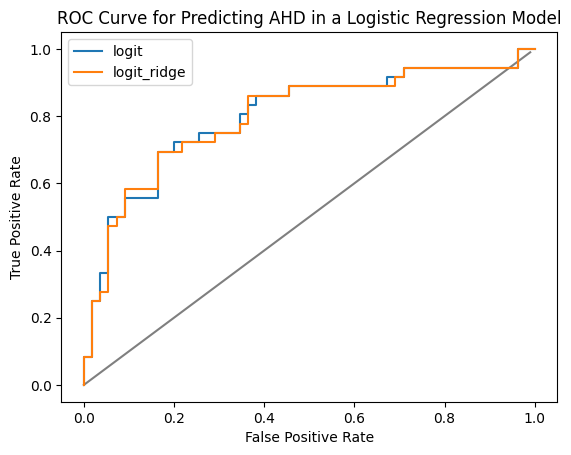

[           inf 9.99997420e-01 9.95553695e-01 9.93512108e-01
 9.47927008e-01 9.39448845e-01 8.86892414e-01 8.72156940e-01
 7.93903556e-01 7.70603425e-01 7.48431536e-01 6.75994986e-01
 6.27858695e-01 6.09238669e-01 5.78332021e-01 5.42904311e-01
 5.41254082e-01 4.80838115e-01 4.34604811e-01 4.34305658e-01
 4.18818731e-01 3.67806549e-01 3.54911856e-01 2.64242969e-01
 2.36962800e-01 1.32248924e-01 1.30372946e-01 1.01239530e-01
 9.20064473e-02 2.43168526e-03 1.59627028e-03 1.77504489e-04] [           inf 9.99995131e-01 9.96695960e-01 9.94490879e-01
 9.52268990e-01 9.26681166e-01 8.97718810e-01 8.88315131e-01
 8.05011880e-01 7.83472600e-01 7.74182986e-01 7.66120303e-01
 7.06100768e-01 6.83611688e-01 6.15848642e-01 6.01144045e-01
 5.57590739e-01 5.29319163e-01 5.19019961e-01 4.74516463e-01
 4.48258098e-01 4.20958742e-01 3.56130314e-01 2.39496416e-01
 2.29980376e-01 1.17694500e-01 1.17575705e-01 9.44674480e-02
 9.06363202e-02 2.34019275e-03 1.53322492e-03 1.71781033e-04]


In [ ]:
######
# your code here
######
#!always plot roc with predict_proba because the roc uses different thresholds to plot the graphic
yhat_logit = logit.predict_proba(X_test)[:, 1]
yhat_logit_ridge = logit_ridge.predict_proba(X_test)[:, 1] #se avessimo piu classi faremmo lo stesso plot per ogni indice i (classe i-esima) connsiderando positiva l'appartenenza alla classe e negativa l'appartenenza alle altri classi

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_logit)
fpr_ridge, tpr_ridge, thresholds_ridge = metrics.roc_curve(y_test, yhat_logit_ridge)


x=np.arange(0,100)/100
plt.plot(x,x,color="black",alpha=0.5)
plt.plot(fpr,tpr,label="logit")
plt.plot(fpr_ridge,tpr_ridge,label="logit_ridge")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting AHD in a Logistic Regression Model")
plt.legend()
plt.show()





In [14]:
print(metrics.auc(fpr,tpr)) #this is better because is greater than ridge
print(metrics.auc(fpr_ridge,tpr_ridge)) #even if it's worse it's not bad, the regularization made the model more resistent to outliers and noise without significantly worsening the original auc.

0.8
0.7984848484848486


In [ ]:
#So it could be better and more generalizated for new datasets